In [111]:
import pandas as pd 
import seaborn as sns
import numpy as np 
#from sklearn.datasets import load_boston # removed from python 1.2

In [112]:
df = pd.read_csv("AmesHousing.csv")

In [113]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [114]:
df.shape

(2930, 82)

In [115]:
# performing EDA -> Exploratory data analysis

In [116]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [117]:
null_percentage = (df.isnull().sum()/len(df))*100

In [118]:
null_percentage

Order              0.000000
PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 82, dtype: float64

In [119]:
# displaying only null valued coulmns
null_percentage= null_percentage[null_percentage>0]
null_percentage

Lot Frontage      16.723549
Alley             93.242321
Mas Vnr Type      60.580205
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Bsmt Exposure      2.832765
BsmtFin Type 1     2.730375
BsmtFin SF 1       0.034130
BsmtFin Type 2     2.764505
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Electrical         0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Fireplace Qu      48.532423
Garage Type        5.358362
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Cars        0.034130
Garage Area        0.034130
Garage Qual        5.426621
Garage Cond        5.426621
Pool QC           99.556314
Fence             80.477816
Misc Feature      96.382253
dtype: float64

# as the columns such as :
- Alley , Mas Vnr Type, Pool Qc, Fence, Misc Feature 
all these has greater number of missing values therefore drop these values based on how much missing values u can handle



In [120]:
threshold = 30 # here 30 is percentage 
columns_to_drop = null_percentage[null_percentage>threshold].index 
columns_to_drop

Index(['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [121]:
# drop columns
df_cleaned = df.drop(columns=columns_to_drop)

In [122]:
print(df_cleaned)

      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Lot Shape Land Contour Utilities  

In [123]:
df_cleaned.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 76, dtype: int64

In [124]:
(df_cleaned.isnull().sum()/len(df_cleaned))*100

Order              0.000000
PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 76, dtype: float64

In [125]:
# identify numerical and categorical columns
numerical_columns=df_cleaned.select_dtypes(include=['Float64','int64']).columns
numerical_columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [126]:
catagorical_columns=df_cleaned.select_dtypes(include=['object','category']).columns
catagorical_columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

filling null values

In [127]:
# filling numerical columns
for col in numerical_columns:
    df_cleaned[col].fillna(df_cleaned[col].mean(),inplace=True)

In [128]:
# fillinf catagorical columns with most frequent value
for col in catagorical_columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0],inplace=True)

In [129]:
df_cleaned

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00000,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.00000,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [130]:
# importing library 
from sklearn.model_selection import train_test_split

In [131]:
X= df_cleaned.drop('SalePrice',axis=1)
Y=df_cleaned['SalePrice']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=54)

In [133]:
# As the categorical columns have order in some of them therefore according to them apply one hot encoding or ordinal encoding

In [140]:
# using column transformer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


ordinal_columns = [
    'Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond',
    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'Heating QC', 'Kitchen Qual',
    'Functional', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive'
]
# Define the order of categories for each column
category_order = [
    ['Reg', 'IR1', 'IR2', 'IR3'],  # Lot Shape
    ['AllPub', 'NoSewr', 'NoSeWa'],  # Utilities
    ['Gtl', 'Mod', 'Sev'],  # Land Slope
    ['Ex', 'Gd', 'TA', 'Fa', 'Po'],  # Exter Qual
    ['Ex', 'Gd', 'TA', 'Fa', 'Po'],  # Exter Cond
    ['Ex', 'Gd', 'TA', 'Fa', 'Po'],  # Bsmt Qual
    ['Ex', 'Gd', 'TA', 'Fa', 'Po'],  # Bsmt Cond
    ['Gd', 'Av', 'Mn', 'No'],  # Bsmt Exposure
    ['Ex', 'Gd', 'TA', 'Fa', 'Po'],  # Heating QC
    ['Ex', 'Gd', 'TA', 'Fa', 'Po'],  # Kitchen Qual
    ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],  # Functional
    ['Fin', 'RFn', 'Unf'],  # Garage Finish
    ['Ex', 'Gd', 'TA', 'Fa', 'Po'],  # Garage Qual
    ['Ex', 'Gd', 'TA', 'Fa', 'Po'],  # Garage Cond
    ['Y', 'P', 'N']  # Paved Drive
]

onehot_columns = [
    'MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood',
    'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
    'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Foundation', 'BsmtFin Type 1',
    'BsmtFin Type 2', 'Heating', 'Electrical', 'Garage Type', 'Sale Type',
    'Sale Condition'
]
transformer = ColumnTransformer(transformers=[('tnf1',OrdinalEncoder(categories=category_order),ordinal_columns),
                                             ('tnf2',OneHotEncoder(sparse=False,handle_unknown='ignore'),onehot_columns)],remainder='drop')

In [141]:
X_train_transformed = transformer.fit_transform(X_train)

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [148]:
X_test_transformed = transformer.transform(X_test)

In [149]:
from sklearn.preprocessing import StandardScaler   # to get the data in same scale
scaler=StandardScaler()
numerical_data=df_cleaned[numerical_columns]
X_train_scaled= scaler.fit_transform(numerical_data)
X_test_scaled = scaler.transform(numerical_data)


In [150]:
# performing linear regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [151]:
lr.fit(X_train_transformed,Y_train)


LinearRegression()

In [152]:
# prediction
y_pred=lr.predict(X_test_transformed)

In [154]:
y_pred[1]

164798.0

In [156]:
Y_test[1]

105000

In [158]:
from sklearn.metrics import r2_score
r2_score_=r2_score(Y_test,y_pred)
r2_score_

-6.42128786229019e+17

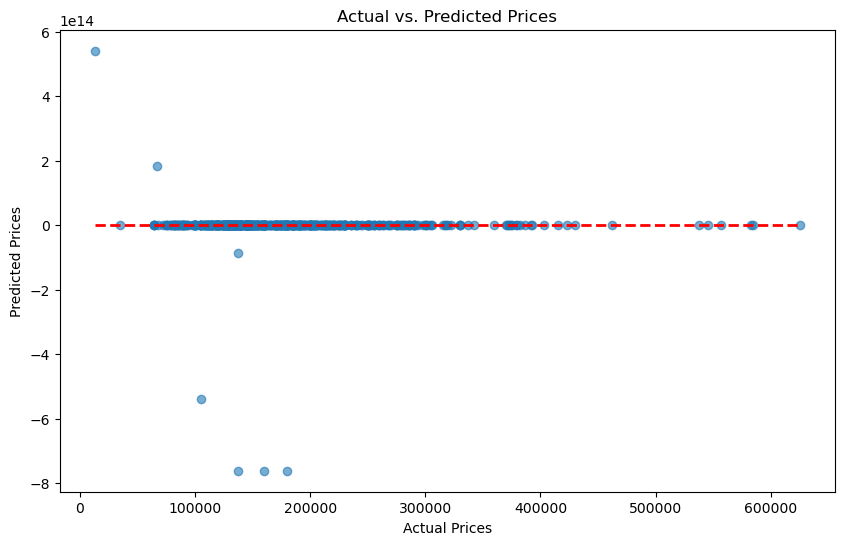

In [161]:
import matplotlib.pyplot as plt 
#Plot actual vs. predicted prices

plt.figure(figsize=(10, 6))

# Use the same number of values for both y_test and y_pred for scatter plot

plt.scatter(Y_test[:len(y_pred)], y_pred, alpha=0.6)  # Assuming y_pred is the output of your model

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)

plt.title("Actual vs. Predicted Prices")

plt.xlabel("Actual Prices")

plt.ylabel("Predicted Prices")

plt.show()

as you have seen that linear regreassion model is not performing good in this 
therefore use another model